# Table of Contents

* [1. Introduction](#1)
* [2. Background and History](#2)
* [3. Terminiology](#3)
* [4. Example: The Iris Dataset](#4)
* [5. Alternatives and Evolution](#5)
* [6. Summary](#6)

<img src="http://4.bp.blogspot.com/-DJSvG22i-e8/U-IbKEFte9I/AAAAAAAABfI/Ng9lSqk2iX0/s1600/boxplotcat.jpg" width='350'>


# 1. Introduction <a class="anchor" id="1"></a>

This notebook will explore the boxplot, also known as box-and-whisker-plot. While widely used in statistics and analytics, it is not as intuitive to read to the untrained eye as many other common graphs, like a scatterplot or histogram. I will give some background on the boxplot, its creator, demonstrate how the boxplot can be generated in Python and also explain the relevant terminology needed to understand what boxplots are all about.


<img src="https://www.python-graph-gallery.com/wp-content/uploads/32_Custom_Boxplot_Appearance_Seaborn3.png" width='350'>



# 2. Background and History<a class="anchor" id="2"></a>



> "the boxplot comes from the fertile brain of John Tukey (1977), who has done as much for exploring the beauty of data as Marilyn Monroe has done for the calendar" (1)

<img src="https://upload.wikimedia.org/wikipedia/en/e/e9/John_Tukey.jpg" width='250'>

The boxplot was introduced in 1977 by John W. Tukey in his book "Exploratory Data Analysis" (EDA). Tukey believed that more emphasis needs to be placed on exploring the data first to come up with a suitable hypothesis, rather than going in immediately with statistical hypothesis testing also known as "Confirmatory Data Analysis"(CDA) as this can lead to bias. (2) A train of thought that he shared with his colleague Francis Anscombe, who demonstrated on the Anscombe quartet that descriptive statistics by themselves can be misleading and that data should also be explored visually. The boxplot distinguishes itself from many other data visualizations by displaying the "five number summary" of the data at hand as well as displaying outliers clearly.

Tukey has already been a household name in statistics being a founding chairman of the Princeton statistics department and being credited to have coined the term "bit" as a shorter version of "binary digit" while working with John von Neumann on early computer designs (2). With EDA, he aimed to broaden data analysis by starting every investigation with an open mind and exploring the data. This should lead to starting the data investigation with the following two steps, while staying flexible as the data unfolds: 

- 1. Start with an idea
- 2. Iterate between asking a question and creating a design (4)

#### References

(1) Biostatistics: The Bare Essentials,  Geoffrey R. Norman, David L. Streiner, 2008, p. 26

(2) https://en.wikipedia.org/wiki/John_Tukey

(3) https://en.wikipedia.org/wiki/Five-number_summary

(4) Exploratory Data Analysis with MATLAB,  Wendy L. Martinez, Angel R. Martinez, Jeffrey Solka, Angel Martinez, 2011, p. 4


# 3.  Terminology <a class="anchor" id="3"></a>

Above I have introduced the 5 number summary. The five numbers heavily rely on **percentiles**. The nth percentile usually indicates that n percent of samples fall below this percentile. If you score in the 80th percentile in an exam, then 80% of results are below your mark meaning that you scored better than 80% of the other students. (1) There are different approaches to whether or not the nth percentile is the lowest score that is greater than n percent, or whether it is the score that is greater or equal.


<img src="https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2013/09/percentile.png" width='350'>



  * **the sample minimum (smallest observation)**: This is the 0th percentile.

  * **the lower quartile or first quartile**: This is the 25th percentile.

  * **the median (the middle value)**: This is the 50th percentile.

  * **the upper quartile or third quartile**: This is the 75th percentile.

  * **the sample maximum (largest observation)**: This is the  100th percentile.


The **interquartile range (IQR)** is another key concept of the boxplot. It refers to the difference between the third and first quartile, the 75th percentile and the 25th percentile meaning the middle 50% of data. (1)

Additionally, boxplots show outliers and can go as far as to differenciate between a **suspected outlier** and **outliers**. Outliers are "an observation that lie an abnormal distance from other values in a random sample from a population." (2) Definitions on what this abnormal distance is, can vary. For the boxplot, it is the following: 


> **Outliers** are either 3×IQR or more above the third quartile or 3×IQR or more below the first quartile. (3)

> **Suspected outliers** are are slightly more central versions of outliers: either 1.5×IQR or more above the third quartile or 1.5×IQR or more below the first quartile. (3)

<img src="http://www.physics.csbsju.edu/stats/complex.box.defs.gif" width='250'>

#### References

(1) https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/percentiles-rank-range/

(2) https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm

(3) http://www.physics.csbsju.edu/stats/box2.html

# 4. Example: The Iris Data Set <a class="anchor" id="4"></a>

In this section I will demonstrate boxplots and explain the above terminology. There are several ways to generate boxplots in Python. Packages such as pandas, seaborn and matplotlib offer inbuilt commands to call a boxplot and various ways to customize the plot.

To illustrate the boxplot and its characterists, let's have a look at boxplots of the famous Iris Data Set. The Iris Data Set contains of measurements of 3 different species of the Iris flower. The boxplot is a useful first step as it displays actual datapoints in the dataset and gives a visual overview of the five number summary.


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


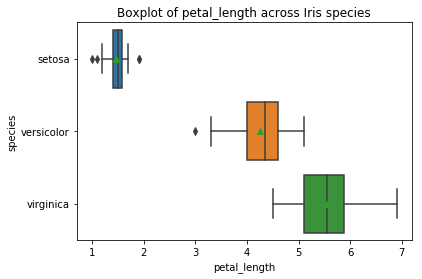

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb 

#load dataset
iris = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
print(iris.head()) #show first 5 rows

setosa = iris[iris['species']== 'setosa']
versicolor = iris[iris['species']== 'versicolor']
virginica = iris[iris['species']== 'virginica']


#generate boxplot of columns
sb.boxplot(data = iris, x='petal_length', y='species', orient = 'h', showmeans=True)
plt.title('Boxplot of petal_length across Iris species')
plt.show()

The above boxplot depicts the 5 number summary of the variable "petal_length" across the three different species. We can clearly distinguish the minimum and maximum values of each species and can see, that both setosa and versicolor have outliers. These are values that lie more than 1,5 interquartile ranges away from the first / third quartile and outside the box. The range of setosa is considerably smaller than of the other two species and is causing the middle 50% of data to be very squashed around the same values. The boxes are not divided evenly by the median, giving a clue that the data might be skewed.

With only this boxplot it is possible to draw first conclusions. It is evident that virginica tends to have the longest petals, while setosas petals are significantly shorter than the other two. In fact, the setosa petals are so short, that no other petal comes short in size, while versicolor and virginica have an overlap in petal length, so that these could not be told apart only by the loop at their petals.

You might have noticed the green triangle in each box which has not been accounted for so far. The green traingle is the mean and usually not a part of the boxplot. We have defined above that the line through the box is the median. It is easy to confuse the two, especially as they can be the same or very close, however it is important to distinguish: 

- The **mean** is the average: Add all values and divide by the number of elements
- The **median** is middle value: Rank all values and divide the number of elements by 2 - the element at the n-th rank is the median.

As can be seen above for versicolor, the mean is distintively different from the median, it is lower. This could be due to the outlier on the lower end of the box, which pulls the mean down.

However, be careful ending your analysis with the insights gained from an initial boxplot. They can be deceiving. A particular weakness of the boxplot is a low sample size. It is only possible to make these assumptions on the Iris dataset when we know that all species have the same amount of datapoints in the dataset. [This blogpost](http://blog.minitab.com/blog/statistics-and-quality-data-analysis/how-to-think-outside-the-boxplot) gives a great example of a deceiving boxplot: 

<img src="https://blog.minitab.com/hubfs/Imported_Blog_Media/boxplot_of_s4__l4.jpg" width='450'>

On first inspection, one would think that the right data has a lot higher variability. However, as it turns out the main difference is that the left data is a sample of 100 datapoints from a normal distribution, while the right data only consists of 4 datapoints from a normal distribution. (1) It is therefore important to follow in Tukey's footsteps and continue to explore data further with every new clue you get.

#### References

(1) http://blog.minitab.com/blog/statistics-and-quality-data-analysis/how-to-think-outside-the-boxplot



# 5. Alternatives and Evolution <a class="anchor" id="5"></a>


As can be seen above, the boxplot is a powerful tool to quickly showcase the five number summary of data. It relies on actual datapoints rather than calculated values, such as the mean. However, this poses a limitation to the cases in which the boxplot can be used: the data has to be rankable. (1) If the data can't be sorted from low to high, say for categorical values like haircolor and eyecolor, the boxplot cannot be used.

It also has further limitations. The boxes do not show how many datapoints they contain and in comparison to a histogram, information about the distribution isn't as detailed. As Hadley Wickham and Lisa Stryjewski point out in their paper "40 years of boxplots" these constraints may stem from the origins of the boxplots. In the 70s, before computers were as advanced and common in every household, the boxplot was designed to be drawn by hand,  easily put together once the 5 number summary was calculated. (1)

Since then, the boxplot has seen  various evolutions and the above mentioned paper gives a great overview of these evolutions, including colored variants and attempts to give boxplots a second dimension. The violinplot below nicely outlines the distribution of the same data as above. In comparison to the boxplot of the same stats above, it is much more evident that setosa has a higher density of values in the inner quartile, while this information could not be deduced from the boxplot unless one knew all species had the same amount of samples. It also shows that the the data is a lot more evenly distributed for the other two varieties, while offering the same information on min / max and median as the boxplot. One thing to keep in mind for violinplots on small datasets like the Iris dataset is however, that violinplots use a kernel density estimation of the underlying distribution. This can lead to small datasets looking a lot smoother due to the estimation than they really are. (2)

#### References

(1) http://vita.had.co.nz/papers/boxplots.pdf

(2) https://seaborn.pydata.org/generated/seaborn.violinplot.html

C:\Users\sarah\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


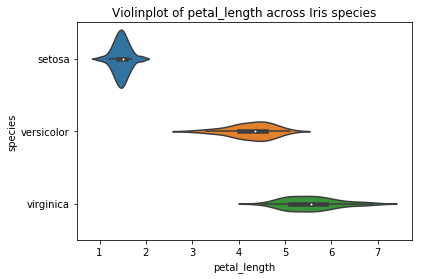

In [3]:
#violinplot shows how the values are distributed

sb.violinplot(data = iris, x='petal_length', y='species', orient = 'h', showmeans=True)
plt.title('Violinplot of petal_length across Iris species')
plt.show()

# Summary <a class="anchor" id="6"></a>

We have learnt that the **boxplot** can also be referred to as **box-and-whisker plot**. It displays the datapoints which describe the **5 number summary**, which consists of the **percentiles: minimum, first quartile, median, third quartile, maximum.** The middle 50% of the data lies between the first quartile and the third quartile and is depicted by the box that gives the boxplot its name. It is also referred to as the **interquartile range**. The interquartile range also build the basis for identifying **outliers**, which are depicted as dots outside of the whiskers of the box-and-whisker plot. An outlier is a datapoint which lies more than 1,5 interquartile range outside of the **whisker**, with each whisker being the length of 1,5 interquartile range. Furthermore we have defined the difference between **median** and **mean**, of which the main takeaway is, that the mean is a calculated value while the median refers to the actual middle value within the data once it was ranked. A boxplot generated in matplotlib.pyplot served as an example of how a boxplot can be generated and read.

The data being **rankable** was identified as a main requirement for using a box and whisker plot and a boxplot analysis gone wrong has illustrated that boxplots are most reliable when used on **large datasets**. An exploration into the background and history of the boxplot showed that it is important to not rely to heavily on first impressions or approach a dataset with bias but to take the insights and investigate further. This approach is known as **exploratory data analysis (EDA)** and was coined by **John Tukey**, the inventor of the boxplot. Since 1977, when Tukey introduced the boxplot it has seen various variations, mostly enabled due to the rise of computing and expanded possibilities in creating accurate graphs. We have had a look at a **violinplot** to illustrate how useful it can be to get an understanding of the distributions of data. 